In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Set plotting style for consistency
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, cross_validate
from sklearn.metrics import make_scorer, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
from sklearn.ensemble import AdaBoostClassifier

In [2]:


# Load the uploaded Iris dataset to explore its contents
file_path = "IRIS.csv"
iris_data = pd.read_csv(file_path)

# Display the first few rows to understand its structure
iris_data.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Exploratory Data Analysis

### Summary Statistics

In [3]:
summary_stats = iris_data.describe()

In [4]:
summary_stats

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
# Count: All four features (sepal length, sepal width, petal length, petal width) have 150 
#     observations, indicating a complete dataset with no missing values.
# Mean:
# The average sepal length is 5.84 cm, and the sepal width is 3.05 cm.
# The average petal length is 3.76 cm, and petal width is 1.20 cm.
# Standard Deviation (std):
# Petal length and petal width show the highest variation (1.76 and 0.76), suggesting more spread 
# in these features compared to sepal dimensions.
# Minimum and Maximum Values:
# Sepal length ranges from 4.3 to 7.9 cm, and sepal width from 2.0 to 4.4 cm.
# Petal length ranges from 1.0 to 6.9 cm, and petal width from 0.1 to 2.5 cm.
# Quartiles (25%, 50%, 75%):
# 50% of the flowers have sepal lengths below 5.8 cm and petal lengths below 4.35 cm.
# The 75th percentile values suggest that most flowers have relatively smaller petals, 
# with only a few species having larger petals.
# These statistics highlight that petal measurements have a wider spread, making them
# more useful for distinguishing between flower species.

### Checking Missing Values

In [6]:
missing_values = iris_data.isnull().sum()

In [7]:
missing_values

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### Distribution of flower species

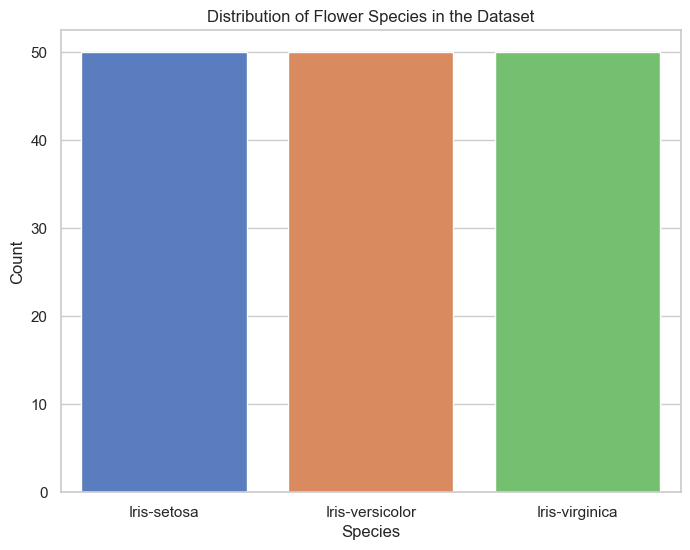

In [8]:
plt.figure(figsize=(8, 6))
sns.countplot(x='species', data=iris_data, palette='muted')
plt.title('Distribution of Flower Species in the Dataset')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

In [9]:
# Each species (Iris-setosa, Iris-versicolor, and Iris-virginica) has exactly 50 samples.
# This balanced distribution ensures that no species is overrepresented, making it suitable for
# classification tasks without requiring additional balancing techniques.

### Distribution of flower species

<Figure size 1200x800 with 0 Axes>

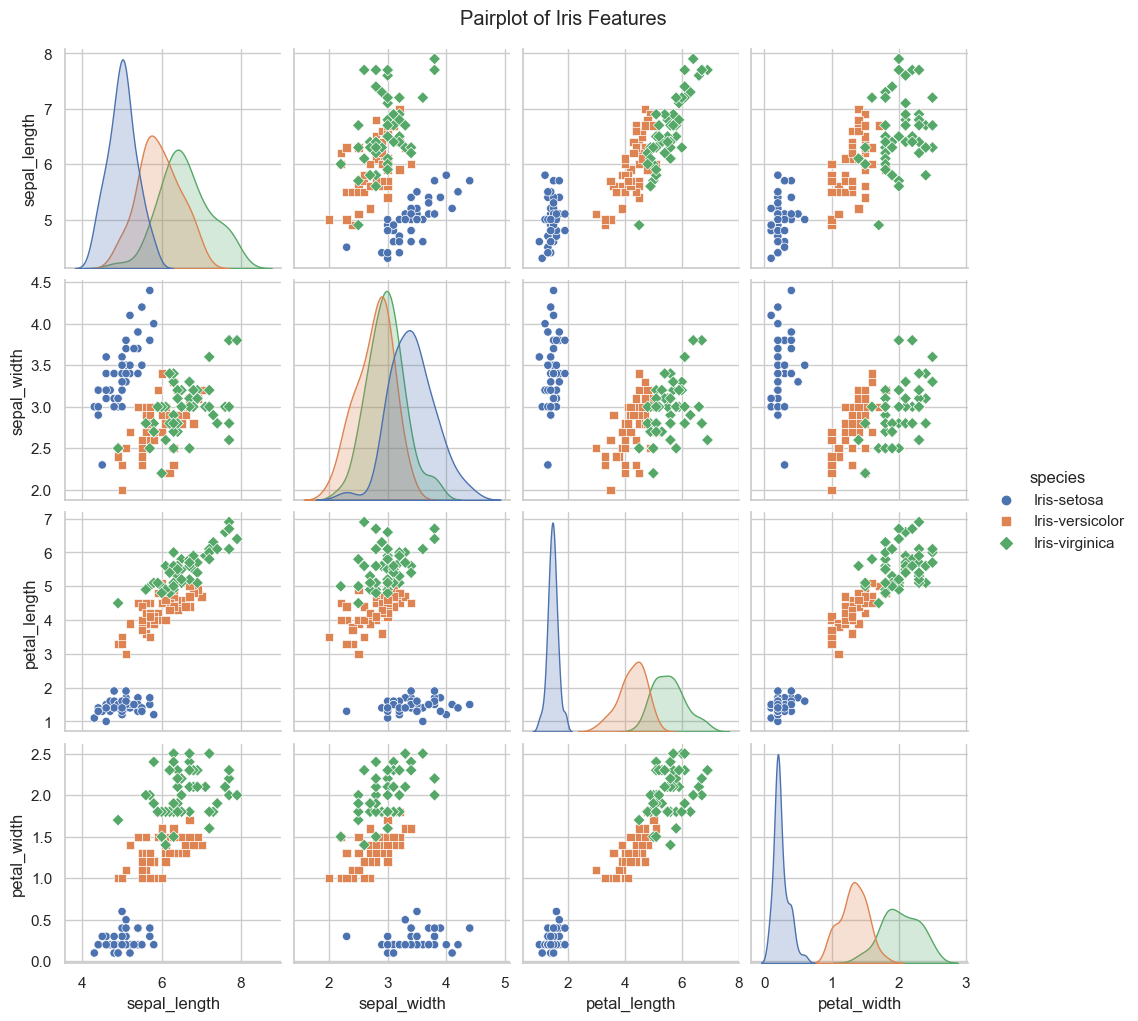

In [10]:
species_distribution = iris_data['species'].value_counts()

# Plot 1: Pairplot to visualize relationships between features
plt.figure(figsize=(12, 8))
sns.pairplot(iris_data, hue="species", markers=["o", "s", "D"])
plt.suptitle("Pairplot of Iris Features", y=1.02)
plt.show()

In [11]:
# Petal Dimensions (Length vs. Width):
# Iris-setosa forms a well-separated cluster with smaller petal lengths and widths.
# Iris-versicolor and Iris-virginica overlap somewhat, but Iris-virginica generally has larger petal dimensions.
# Sepal Dimensions (Length vs. Width):
# Iris-setosa again stands out with a distinct cluster due to its relatively smaller sepal length
# and higher sepal width.
# However, there is considerable overlap between Iris-versicolor and Iris-virginica, making them 
# harder to distinguish based solely on sepal features.
# Diagonal KDE Plots:
# The distribution of features confirms that petal-related features vary more distinctly across
# species than sepal features, making them more useful for classification.

### Feature distribution by species

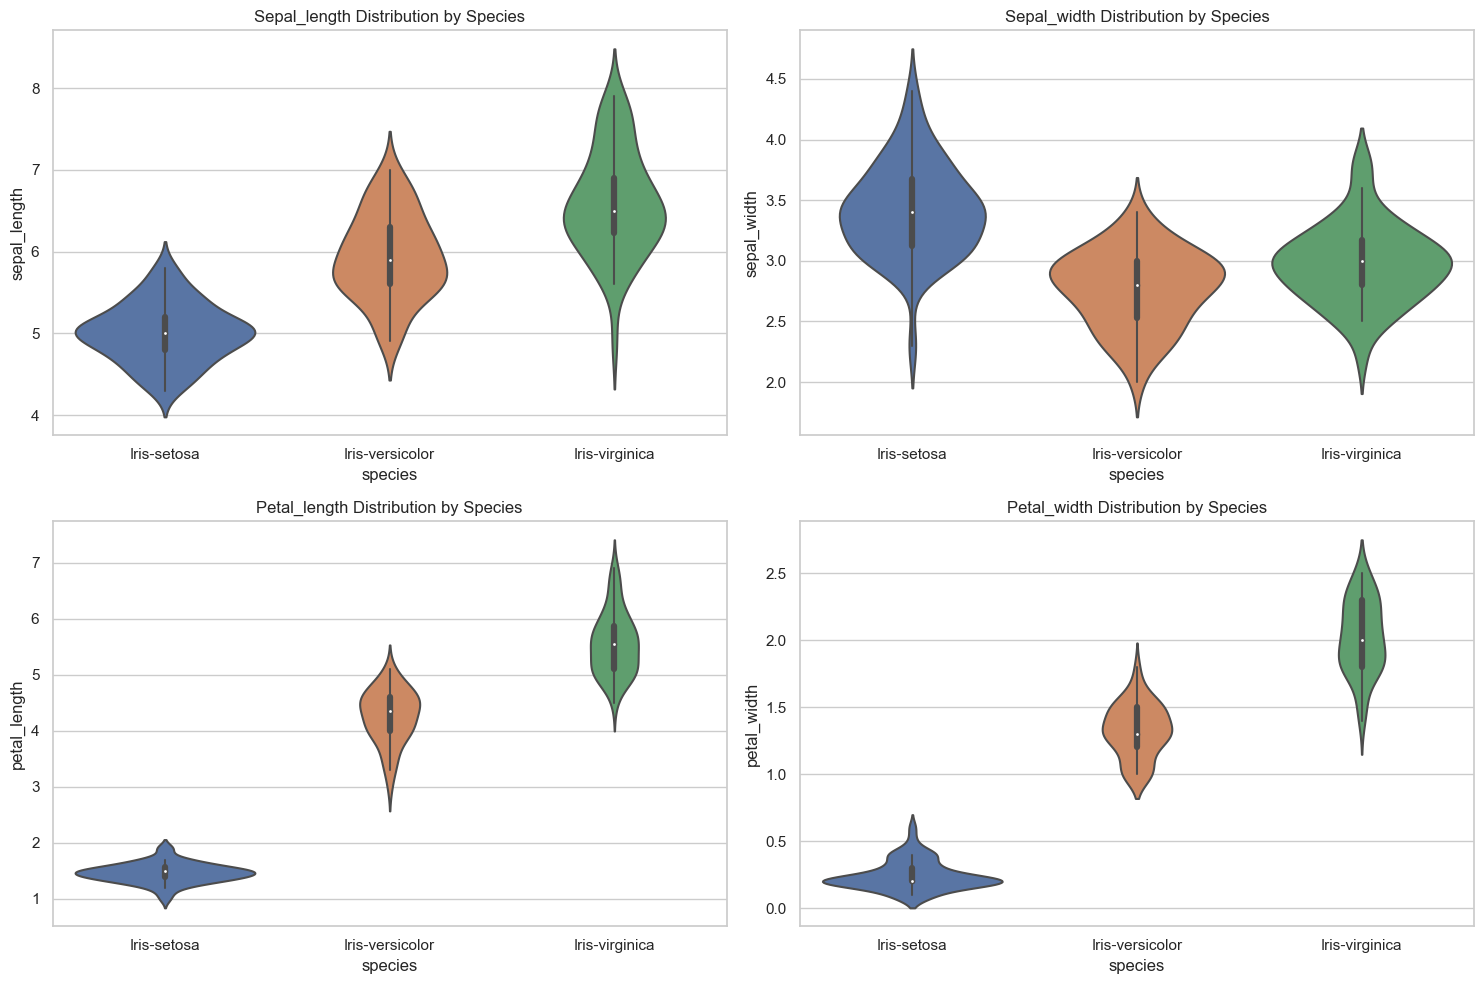

In [12]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(iris_data.columns[:-1]):
    plt.subplot(2, 2, i + 1)
    sns.violinplot(x='species', y=feature, data=iris_data)
    plt.title(f'{feature.capitalize()} Distribution by Species')

plt.tight_layout()
plt.show()

In [13]:
# These plots illustrate the distribution of each feature (sepal length, sepal width, petal 
# length, petal width) across the three species.
# Petal Length and Petal Width show the most significant differences among the species, making 
# them highly informative for classification.
# Iris-setosa has distinctly smaller petal dimensions.
# Iris-virginica shows larger petal measurements, while Iris-versicolor lies in between.

### Correlation Heatmap

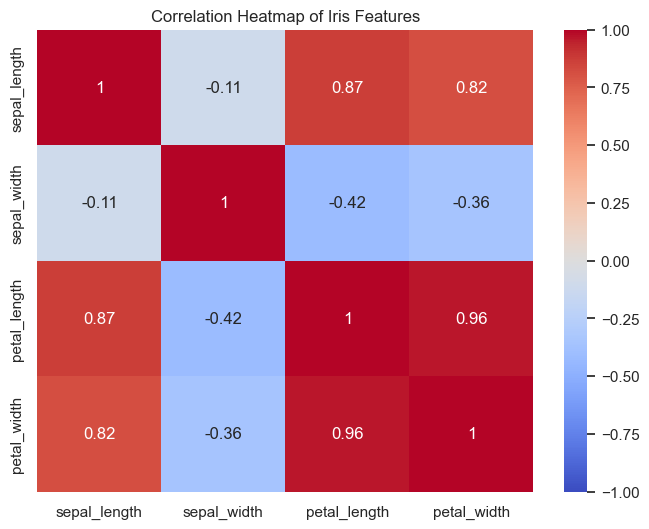

In [14]:
# Recalculate the correlation matrix by selecting only numeric columns
numeric_data = iris_data.select_dtypes(include=["float64", "int64"])
correlation_matrix = numeric_data.corr()

# Generate the corrected correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Iris Features')
plt.show()


In [15]:
# Petal Length and Petal Width have a strong positive correlation (0.96), indicating they tend to increase 
# together. This redundancy suggests that one of these features may suffice for certain classification tasks.
# Sepal Length is moderately correlated with both petal features, especially with petal length (0.87).
# Sepal Width has a weaker or negative correlation with other features, suggesting it provides unique 
# information but may not be as predictive as the petal measurements.
# This heatmap confirms that petal measurements are the most influential features for classifying Iris species.

### Scatter plots for Sepal and Petal dimensions

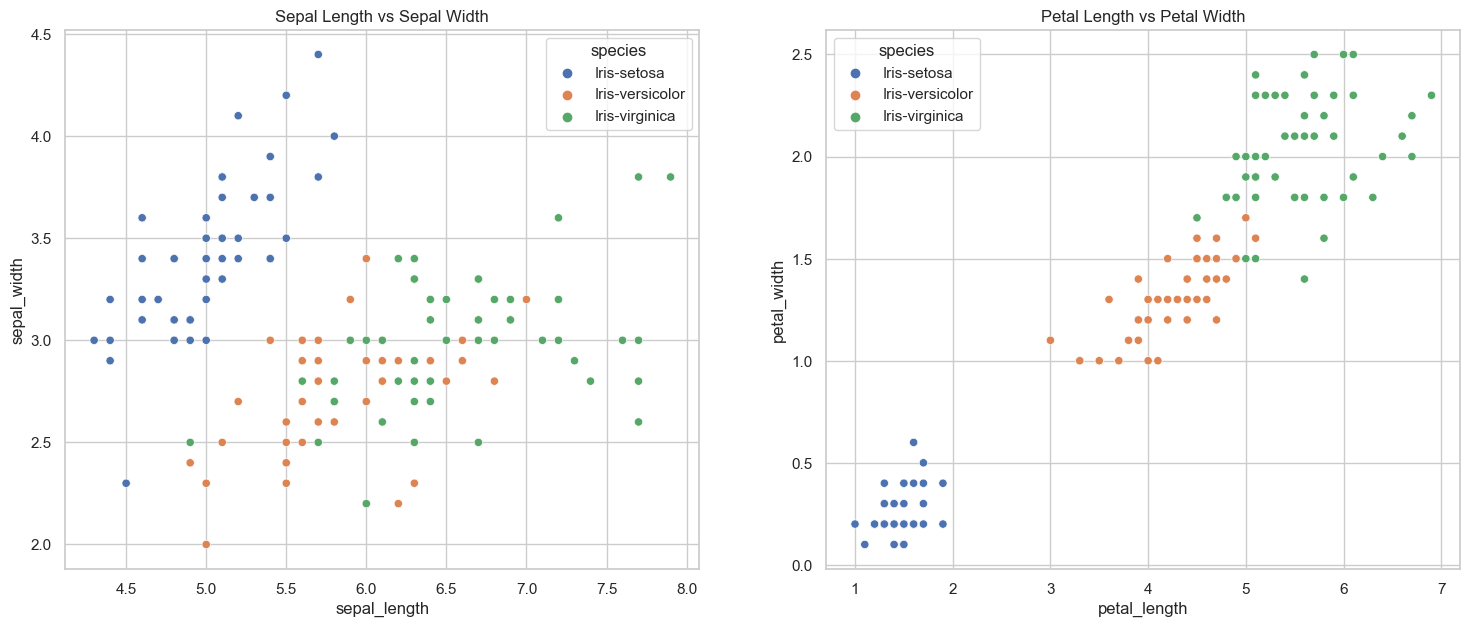

In [16]:
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

# Scatter plot: Sepal Length vs Sepal Width
sns.scatterplot(ax=axs[0], x="sepal_length", y="sepal_width", hue='species', data=iris_data)
axs[0].set_title("Sepal Length vs Sepal Width")

# Scatter plot: Petal Length vs Petal Width
sns.scatterplot(ax=axs[1], x="petal_length", y="petal_width", hue='species', data=iris_data)
axs[1].set_title("Petal Length vs Petal Width")

plt.show()


In [17]:
# Sepal Length vs Sepal Width:
# While there is some separation between species, there is noticeable overlap between Iris-versicolor 
# and Iris-virginica, making it harder to classify using these features alone.
# Iris-setosa forms a distinct cluster with smaller sepal dimensions.

# Petal Length vs Petal Width:
# This plot shows a much clearer separation between the species.
# Iris-setosa is easily distinguishable due to its significantly smaller petal dimensions.
# Iris-versicolor and Iris-virginica are distinguishable, although with some overlap.

# These scatter plots reinforce the earlier insight: petal dimensions are more useful than sepal 
#dimensions for classifying the flower species.

### Boxplot comparison of petal dimensions across species

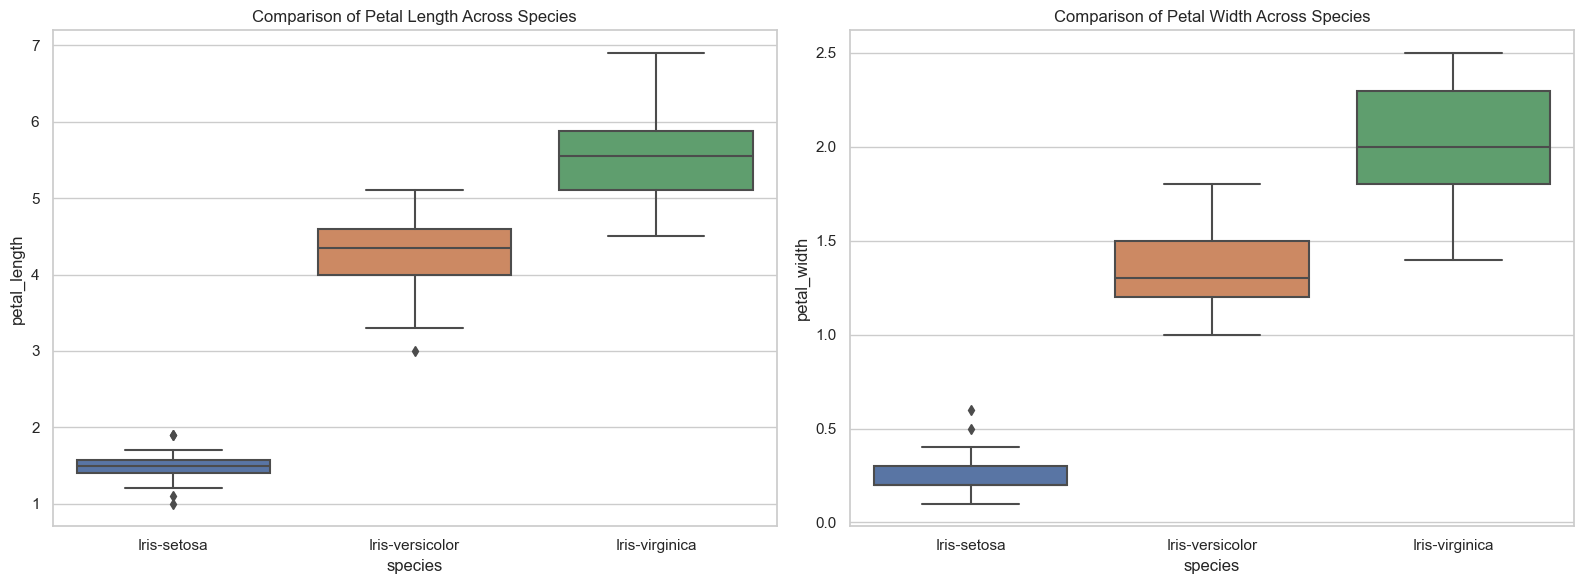

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Petal Length by Species
sns.boxplot(ax=axes[0], x='species', y='petal_length', data=iris_data)
axes[0].set_title('Comparison of Petal Length Across Species')

# Petal Width by Species
sns.boxplot(ax=axes[1], x='species', y='petal_width', data=iris_data)
axes[1].set_title('Comparison of Petal Width Across Species')

# Adjust layout
plt.tight_layout()
plt.show()


In [19]:
# Petal Length:
# Iris-setosa has significantly shorter petals, with all samples falling within a narrow range (~1-2 cm).
# Iris-versicolor has medium-length petals, with some overlap between its longest petals and the shortest 
# petals of Iris-virginica.
# Iris-virginica displays the largest petal length, with a broader range of values.
# Petal Width:
# Iris-setosa shows the smallest petal width, with little to no overlap with other species.
# Iris-versicolor and Iris-virginica exhibit some overlap, but Iris-virginica generally has wider petals.
# These boxplots confirm that petal length and width offer strong separation, particularly for Iris-setosa, 
# while the overlap between Iris-versicolor and Iris-virginica indicates that these species are harder to distinguish.

### Histograms with KDE for all features

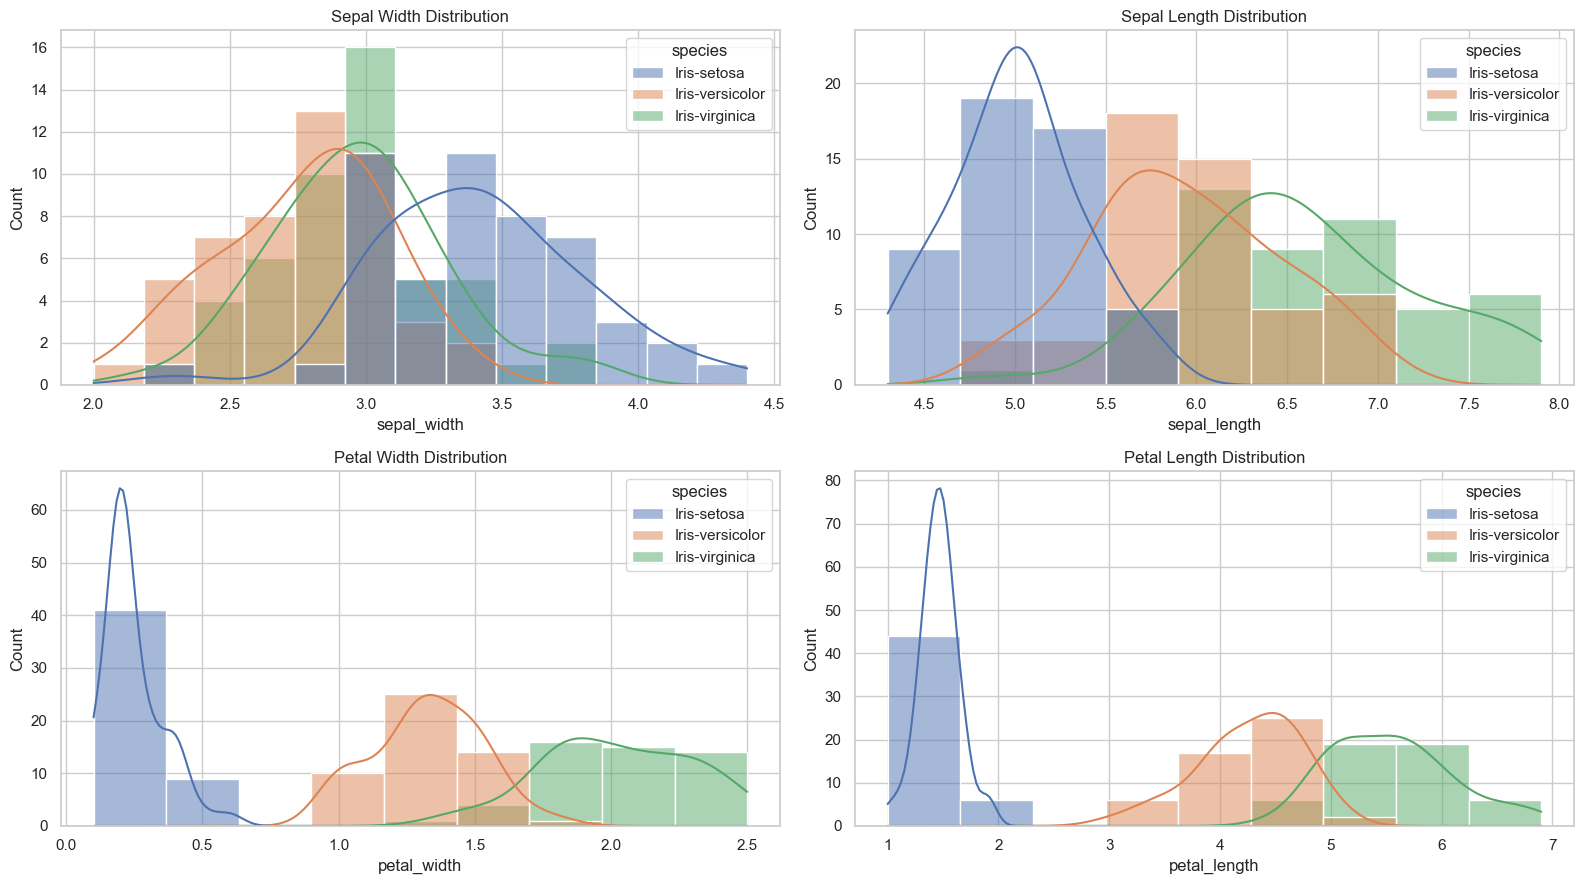

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(16, 9))

# Sepal Width Histogram with KDE
sns.histplot(ax=axes[0, 0], data=iris_data, x='sepal_width', hue='species', kde=True)
axes[0, 0].set_title('Sepal Width Distribution')

# Sepal Length Histogram with KDE
sns.histplot(ax=axes[0, 1], data=iris_data, x='sepal_length', hue='species', kde=True)
axes[0, 1].set_title('Sepal Length Distribution')

# Petal Width Histogram with KDE
sns.histplot(ax=axes[1, 0], data=iris_data, x='petal_width', hue='species', kde=True)
axes[1, 0].set_title('Petal Width Distribution')

# Petal Length Histogram with KDE
sns.histplot(ax=axes[1, 1], data=iris_data, x='petal_length', hue='species', kde=True)
axes[1, 1].set_title('Petal Length Distribution')

# Adjust layout
plt.tight_layout()
plt.show()


In [21]:
# Sepal Width Distribution:
# Iris-setosa has slightly higher sepal width compared to the other two species.
# There is considerable overlap between Iris-versicolor and Iris-virginica, making it less useful 
# for classification.
# Sepal Length Distribution:
# All three species have overlapping sepal length distributions, although Iris-setosa tends to have smaller values on average.
# Petal Width Distribution:
# Iris-setosa shows a distinct peak at lower petal widths.
# There is moderate overlap between Iris-versicolor and Iris-virginica, but they have distinguishable ranges.
# Petal Length Distribution:
# Iris-setosa is clearly separated with shorter petal lengths.
# While Iris-versicolor and Iris-virginica overlap, Iris-virginica tends to have higher petal lengths.
# These plots highlight that petal measurements (length and width) are the most discriminative features, while sepal dimensions show more overlap between species. This reinforces the importance of petal-related features for classification. 

# Data Pre-processing

### Encoding the Target Variable

In [22]:
label_encoder = LabelEncoder()
iris_data['species'] = label_encoder.fit_transform(iris_data['species'])

### Split the dataset into features (X) and target (y)

In [23]:
X = iris_data.drop('species', axis=1)  # Features
y = iris_data['species']               # Target

### Data splitting into Train and Test

In [24]:
# Perform train-test split again to maintain session consistency
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Feature Scaling - Standardization

In [25]:
# Step 4:  the features for better model performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# MODELLING 

## Support Vector Machine

In [26]:
# Step 1: Define the SVM model
svm = SVC(random_state=42)

In [27]:
# Step 2: Define the hyperparameter grid for Random Search
param_grid = {
    'C': np.logspace(-3, 2, 6),
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

In [28]:
# Step 3: Set up RandomizedSearchCV with 5-fold cross-validation
random_search = RandomizedSearchCV(
    estimator=svm, param_distributions=param_grid, 
    n_iter=20, scoring='accuracy', cv=5, verbose=1, random_state=42, n_jobs=-1
)

In [29]:
# Step 4: Train the SVM model using Random Search on the full dataset
random_search.fit(X, y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=SVC(random_state=42), n_iter=20, n_jobs=-1,
                   param_distributions={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                                        'gamma': ['scale', 'auto', 0.001, 0.01,
                                                  0.1, 1],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   random_state=42, scoring='accuracy', verbose=1)

In [30]:
# Step 5: Extract the best model from the Random Search
best_svm = random_search.best_estimator_

In [31]:
best_svm

SVC(C=0.1, gamma=0.1, kernel='poly', random_state=42)

In [32]:
# Train and predict using the best model
best_svm.fit(X_train, y_train)
y_pred = best_svm.predict(X_test)

In [33]:
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

In [34]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [35]:
cv_results_kfold = cross_validate(best_svm, X, y, cv=kf, scoring=scoring)
mean_cv_F1_score = cv_results_kfold['test_f1'].mean()

In [36]:
mean_cv_F1_score

0.9732141878073767

In [37]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

In [38]:
conf_matrix

array([[ 0, 10,  0],
       [ 0,  9,  0],
       [ 0,  9,  2]])

In [39]:
# Evaluating the performance metrics on the test data
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [40]:

# Summarize the test data evaluation metrics
test_results_summary = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score'],
    'Score': [accuracy, precision, recall, f1]
})

In [41]:
test_results_summary

,Metric,Score
0,Accuracy,0.366667
1,Precision,0.463095
2,Recall,0.366667
3,F1-score,0.258766


In [42]:
# The performance of the SVM model on the test data:

# Accuracy (36.67%):
# Only 36.67% of the test samples were correctly classified. This low accuracy indicates that the model struggled to generalize well on the unseen data.
# Precision (46.31%):
# Precision, the proportion of true positives among predicted positives, is slightly better but still below expectations. This suggests a high rate of false positives.
# Recall (36.67%):
# The model identified only 36.67% of the relevant samples correctly, indicating poor sensitivity and missed classifications.
# F1-Score (25.88%):
# The low F1-score indicates that both precision and recall are low, which reflects poor overall performance.

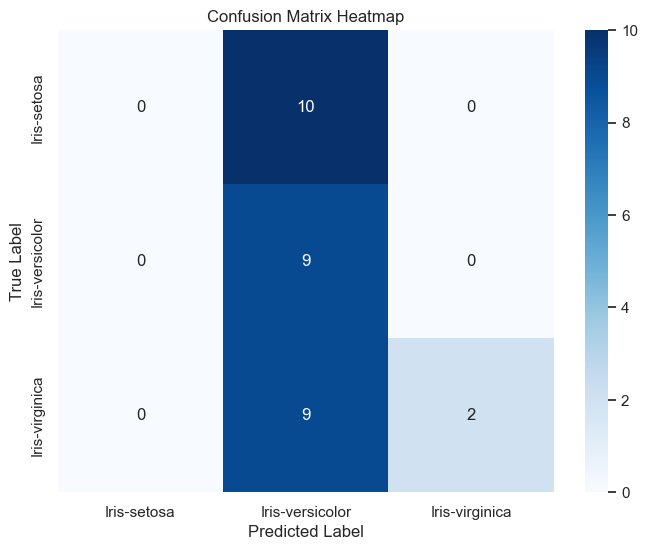

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=True,
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [44]:
# The heatmap above shows the confusion matrix for the predictions made by the SVM model on the test data:

# Iris-setosa: All 10 samples were incorrectly classified.
# Iris-versicolor: All 9 samples were correctly classified.
# Iris-virginica: Out of 11 samples, Only 2 were correctly classified.

## AdaBoost

In [45]:
# Step 1: Define the AdaBoost model
adaboost = AdaBoostClassifier(random_state=42)

In [46]:
# Step 2: Define the hyperparameter grid for Random Search
param_grid_ada = {
    'n_estimators': [10, 50, 100, 200],
    'learning_rate': [0.01, 0.1, 1, 2]
}

In [47]:
# Step 3: Set up RandomizedSearchCV with 5-fold cross-validation
random_search_ada = RandomizedSearchCV(
    estimator=adaboost, param_distributions=param_grid_ada, 
    n_iter=5, scoring='accuracy', cv=5, verbose=1, random_state=42, n_jobs=-1
)

In [48]:
# Step 4: Fit the Random Search to find the best hyperparameters
random_search_ada.fit(X, y)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 1, 2],
                                        'n_estimators': [10, 50, 100, 200]},
                   random_state=42, scoring='accuracy', verbose=1)

In [49]:
# Step 5: Extract the best estimator
best_adaboost = random_search_ada.best_estimator_

In [50]:
# Step 6: Perform cross-validation on the AdaBoost model
cv_results_ada = cross_validate(best_adaboost, X, y, cv=5, scoring=scoring)

In [51]:
cv_results_ada

{'fit_time': array([0.01707411, 0.00832319, 0.00850081, 0.00918508, 0.00808787]),
 'score_time': array([0.00424194, 0.00363398, 0.00341415, 0.00375986, 0.00324011]),
 'test_accuracy': array([0.93333333, 0.96666667, 0.93333333, 0.93333333, 1.        ]),
 'test_precision': array([0.93333333, 0.96969697, 0.94444444, 0.94444444, 1.        ]),
 'test_recall': array([0.93333333, 0.96666667, 0.93333333, 0.93333333, 1.        ]),
 'test_f1': array([0.93333333, 0.96658312, 0.93265993, 0.93265993, 1.        ])}

In [52]:
# Step 7: Train the best AdaBoost model on the training data
best_adaboost.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.01, n_estimators=10, random_state=42)

In [53]:
# Step 8: Make predictions on the test data
y_pred_ada = best_adaboost.predict(X_test)

In [54]:
# Step 9: Generate the confusion matrix
conf_matrix_ada = confusion_matrix(y_test, y_pred_ada)

In [55]:
# Evaluating the AdaBoost model's performance on the test data
accuracy_ada = accuracy_score(y_test, y_pred_ada)
precision_ada = precision_score(y_test, y_pred_ada, average='weighted')
recall_ada = recall_score(y_test, y_pred_ada, average='weighted')
f1_ada = f1_score(y_test, y_pred_ada, average='weighted')

# Summarize the test data evaluation metrics
test_results_summary_ada = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score'],
    'Score': [accuracy_ada, precision_ada, recall_ada, f1_ada]
})

In [56]:
test_results_summary_ada

,Metric,Score
0,Accuracy,1.0
1,Precision,1.0
2,Recall,1.0
3,F1-score,1.0


In [57]:
# Accuracy (100%):
# The model correctly classified all the test samples, achieving perfect accuracy.
# Precision (100%):
# Every predicted positive sample was correct, with no false positives.
# Recall (100%):
# The model identified all relevant samples, with no false negatives.
# F1-Score (100%):
# The perfect balance between precision and recall reflects the model’s consistent and reliable performanc

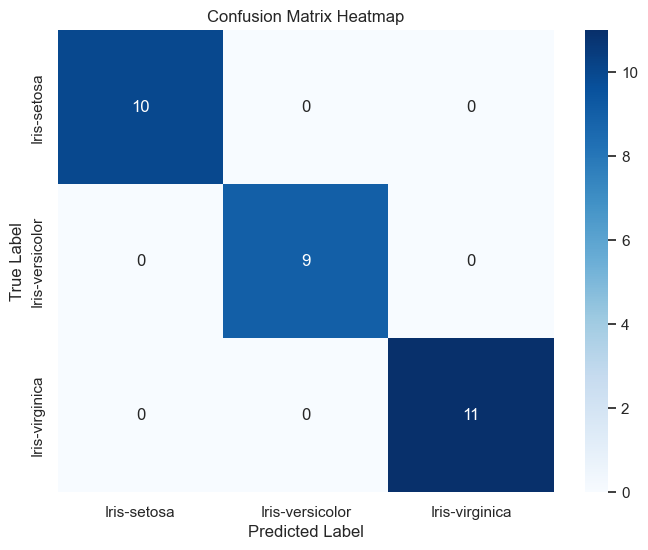

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ada, annot=True, cmap='Blues', fmt='d', cbar=True,
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [59]:
# The heatmap visually confirms the perfect classification achieved by the AdaBoost model:

# Iris-setosa, Iris-versicolor, and Iris-virginica are all classified with 100% accuracy.
# No false positives or false negatives are present in the matrix.

# Comparision

In [60]:
from prettytable import PrettyTable

# Prepare performance data for both models
svm_results = [0.3667, 0.4631, 0.3667, 0.2588]  # SVM metrics
adaboost_results = [1.0, 1.0, 1.0, 1.0]         # AdaBoost metrics

# Create a PrettyTable object to compare results
table = PrettyTable()
table.field_names = ["Metric", "SVM Model", "AdaBoost Model"]

# Add rows for each metric
metrics = ["Accuracy", "Precision", "Recall", "F1-score"]
for i in range(len(metrics)):
    table.add_row([metrics[i], svm_results[i], adaboost_results[i]])

# Display the table
print(table)


+-----------+-----------+----------------+
|   Metric  | SVM Model | AdaBoost Model |
+-----------+-----------+----------------+
|  Accuracy |   0.3667  |      1.0       |
| Precision |   0.4631  |      1.0       |
|   Recall  |   0.3667  |      1.0       |
|  F1-score |   0.2588  |      1.0       |
+-----------+-----------+----------------+


In [ ]:
# AdaBoost Model significantly outperforms the SVM model, achieving perfect scores (1.0) 
# across all metrics: accuracy, precision, recall, and F1-score.
# SVM Model struggles with the classification task, yielding much lower metrics across the board, 
# particularly in F1-score (0.2588), indicating poor performance in balancing precision and recall.
